In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate

from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df=pd.read_csv("Group_13_data_cleaned.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


In [3]:
#Standardizing the data 
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_cluster= df.copy()
df_cluster[df_cluster.columns]=std_scaler.fit_transform(df_cluster)

In [4]:
df_cluster.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,3.673300e+04,3.673300e+04,3.673300e+04,3.673300e+04,3.673300e+04,3.673300e+04,3.673300e+04,3.673300e+04,3.673300e+04,3.673300e+04,3.673300e+04
mean,-1.020971e-17,3.977677e-15,-6.730551e-16,7.202424e-16,2.961965e-19,-6.641414e-15,1.595101e-14,9.119890e-16,-4.563239e-17,-4.518387e-16,4.543291e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-3.190099e+00,-2.614167e+00,-2.874384e+00,-2.404123e+00,-1.874897e+00,-2.733441e+00,-2.045492e+00,-2.144542e+00,-2.028704e+00,-1.048368e+00,-3.372786e+00
25%,-7.964907e-01,-6.731721e-01,-6.715974e-01,-7.420207e-01,-5.803249e-01,-5.573824e-01,-4.452335e-01,-5.799128e-01,-5.745292e-01,-5.259643e-01,-6.962604e-01
50%,1.185237e-02,-7.351515e-02,1.796589e-01,2.087935e-02,-1.095497e-01,2.543220e-01,5.895199e-01,1.442874e-02,-8.772233e-02,-2.912386e-01,-1.236550e-01
75%,7.992483e-01,6.208245e-01,7.969272e-01,5.964947e-01,8.336692e-01,8.933233e-01,6.216053e-01,6.772989e-01,7.297458e-01,2.079127e-01,5.356077e-01
max,2.603653e+00,2.561819e+00,1.547131e+00,2.604268e+00,2.954660e+00,1.117837e+00,7.359094e-01,2.563116e+00,2.686158e+00,1.844329e+01,4.676829e+00


In [5]:
from sklearn.decomposition import PCA
pca_5 = PCA(5)
pca_5_result = pca_5.fit_transform(df_cluster)

print ('Cumulative variance explained by 5 principal components: {:.2%}'.format(np.sum(pca_5.explained_variance_ratio_)))

Cumulative variance explained by 5 principal components: 91.20%


# K means clustering

In [6]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import sklearn.cluster as cluster

inertia = []
for i in (range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

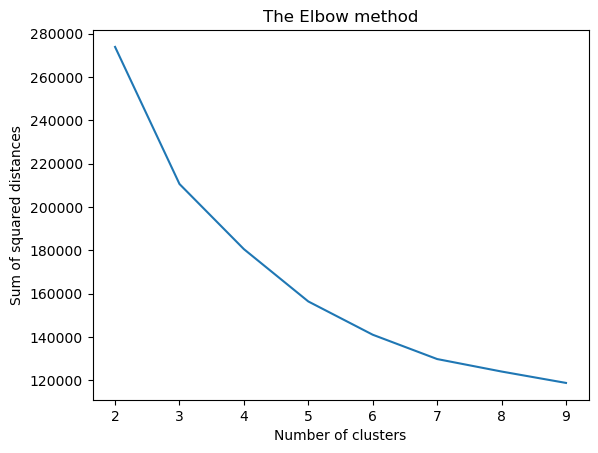

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(2,10), inertia)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [8]:
for i in range(2,10):\
    
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df_cluster)
    score = silhouette_score(df_cluster, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))

For cluster: 2, the silhouette score is: 0.33200076322284705
For cluster: 3, the silhouette score is: 0.294969181993395
For cluster: 4, the silhouette score is: 0.24887397979594197
For cluster: 5, the silhouette score is: 0.27076047527257713
For cluster: 6, the silhouette score is: 0.2556222556048204
For cluster: 7, the silhouette score is: 0.23805234664803251
For cluster: 8, the silhouette score is: 0.22790010121342388
For cluster: 9, the silhouette score is: 0.21000366717386543


In [9]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df_cluster)
    score = silhouette_score(df_cluster, kmeans.labels_)
    silhouette_coefficients.append(score)

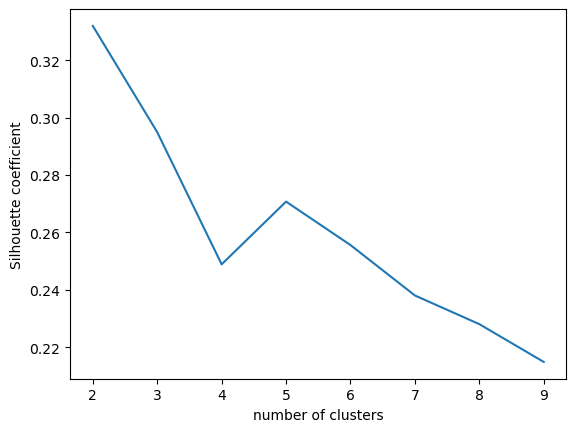

In [10]:
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()


# By above figure we got number of clusters as 4